<div class="alert alert-info">
<h1>Logistics Regression</h1>
<h4>Environmental Statistics 3</h4>
I.E. Azuh/C.F. Dormann
</div>

In today's session on logistic regression, our focus centers on understanding and effectively handling binomial data. Logistic regression is a powerful statistical method used to model binary outcomes, where the response variable takes on two possible values, typically coded as 0 and 1.

We'll delve into techniques for analyzing binomial data, exploring how logistic regression can be employed to model the probability of a particular outcome occurring. This includes understanding the logistic function and interpreting model coefficients in terms of odds ratios.

Through practical examples and hands-on exercises, participants will learn how to apply logistic regression to address a wide range of research questions involving binary outcomes. By the end of the session, attendees will have gained valuable insights into the principles of logistic regression and the tools necessary to conduct robust analyses of binomial data in various fields, including medicine, psychology, and marketing.

# 1.0   Exercise 1: Bernoulli = logistic regression
In the 1996 presidential elections in the USA, Bill Clinton ran against Bob Dole. Here are the results of a poll, along with a range of predictors.

### 1.1    Load the data and look at the *summary* of it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from patsy import dmatrices
import patsy
from scipy import stats
from tabulate import tabulate


In [2]:
# Load dataset
nes96 = pd.read_csv("nes96.csv")
nes96.head(7)

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote
0,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole
1,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton
2,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton
3,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton
4,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton
5,110,3,sliLib,Mod,Con,weakDem,21,Coll,$3Kminus,Clinton
6,100,7,sliCon,Con,Mod,weakDem,77,Coll,$3Kminus,Clinton


### 1.2    Plot vote as a function of population density
Maybe use some transformation of the x-axis to get this more evenly spaced out. Note: if your transformation throws a warning, check that it can be applied to all values in popul. That was the point of the summary statement before!

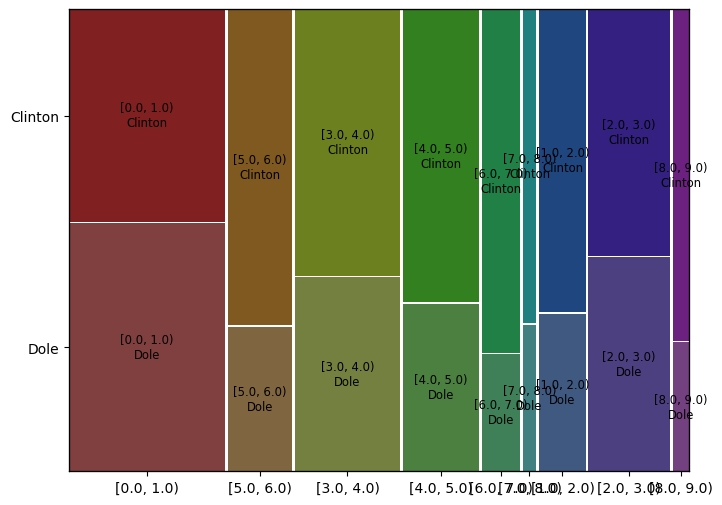

In [3]:
nes96['log_popul'] = np.log(nes96['popul'] + 1)

# Create the mosaic plot
fig, ax = plt.subplots(figsize=(8, 6))
bins = np.arange(0, nes96['log_popul'].max() + 1, 1)
nes96['log_popul_grp'] = pd.cut(nes96['log_popul'], bins, right=False)

mosaic(nes96, ['log_popul_grp', 'vote'], ax=ax)
plt.show()

Notice a pattern? Well, may be there is, maybe there isn’t. Let’s find out.

### 1.3    Fit a GLM to represent this relationship
Note that vote is a factor, with two levels: Clinton and Dole, not 0 and 1.

In [4]:
# Assuming 'X' is your feature matrix and 'y' is the binary response variable

expr = """vote ~ log_popul"""

y, X = dmatrices(expr, nes96, return_type='dataframe')


# Create and Fit the binomial regression model
fm1 = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Display the summary of the regression results
print(fm1.summary())


                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['vote[Clinton]', 'vote[Dole]']   No. Observations:                  944
Model:                                         GLM   Df Residuals:                      942
Model Family:                             Binomial   Df Model:                            1
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -627.40
Date:                             Mon, 18 Mar 2024   Deviance:                       1254.8
Time:                                     12:21:03   Pearson chi2:                     944.
No. Iterations:                                  4   Pseudo R-squ. (CS):            0.02849
Covariance Type:                         nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-

In [5]:
# similarly:

formula = "vote ~ np.log(popul+1)"

# Create and Fit the binomial regression model
fm1b = sm.GLM.from_formula(formula,data=nes96, family=sm.families.Binomial()).fit()

# Display the summary of the regression results
print(fm1b.summary())

                        Generalized Linear Model Regression Results                        
Dep. Variable:     ['vote[Clinton]', 'vote[Dole]']   No. Observations:                  944
Model:                                         GLM   Df Residuals:                      942
Model Family:                             Binomial   Df Model:                            1
Link Function:                               Logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -627.40
Date:                             Mon, 18 Mar 2024   Deviance:                       1254.8
Time:                                     12:21:09   Pearson chi2:                     944.
No. Iterations:                                  4   Pseudo R-squ. (CS):            0.02849
Covariance Type:                         nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0

In [6]:
# We can also Recode to allow Dole take the value of 1.

nes96['vote_ENC'] = (nes96['vote'] == 'Dole').astype(int)  # 1 if 'Dole', 0 if 'Clinton'

expr = """vote_ENC ~ log_popul"""

y, X = dmatrices(expr, nes96, return_type='dataframe')


# Create and Fit the binomial regression model
fm2 = sm.GLM(y, X, family=sm.families.Binomial()).fit()

# Display the summary of the regression results
print(fm2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               vote_ENC   No. Observations:                  944
Model:                            GLM   Df Residuals:                      942
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -627.40
Date:                Mon, 18 Mar 2024   Deviance:                       1254.8
Time:                        12:21:57   Pearson chi2:                     944.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02849
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1065      0.108      0.988      0.3

What does that mean? Is the negative estimate for log(popul+1) consistent with the plot above? <br>

Yes it is: With R the response variable is internally coded as Clinton=0, Dole=1 (in alphabetical sequence). Hence the slope estimate is of the probability of 1 (i.e. voting Dole) as affected by population density. But with Python it is coded as Clinton=1, Dole=0 by default as seen above in the fm1 result, and this can be encoded again to reproduce the same results as in R as seen in fm2 result.

### 1.4    Make a proper plot, with regression line and CI
With “proper”, we mean not this mosaic plot above, but one that shows population density on the x-axis, and the positions of the Clinton/Dole votes as ticks on the axis (using rug). <br>

Then add the regression results to the figure.

In [7]:
# convert factor into 0/1, with 1 for Dole: (Another way to do this)

nes96['Dole'] = nes96['vote'].map({'Dole': 1, 'Clinton': 0})
nes96.head(10)

,popul,TVnews,selfLR,ClinLR,DoleLR,PID,age,educ,income,vote,log_popul,log_popul_grp,vote_ENC,Dole
0,0,7,extCon,extLib,Con,strRep,36,HS,$3Kminus,Dole,0.000000,"[0.0, 1.0)",1,1
1,190,1,sliLib,sliLib,sliCon,weakDem,20,Coll,$3Kminus,Clinton,5.252273,"[5.0, 6.0)",0,0
2,31,7,Lib,Lib,Con,weakDem,24,BAdeg,$3Kminus,Clinton,3.465736,"[3.0, 4.0)",0,0
3,83,4,sliLib,Mod,sliCon,weakDem,28,BAdeg,$3Kminus,Clinton,4.430817,"[4.0, 5.0)",0,0
4,640,7,sliCon,Con,Mod,strDem,68,BAdeg,$3Kminus,Clinton,6.463029,"[6.0, 7.0)",0,0
5,110,3,sliLib,Mod,Con,weakDem,21,Coll,$3Kminus,Clinton,4.709530,"[4.0, 5.0)",0,0
6,100,7,sliCon,Con,Mod,weakDem,77,Coll,$3Kminus,Clinton,4.615121,"[4.0, 5.0)",0,0
7,31,1,sliCon,Mod,sliCon,indRep,21,Coll,$3Kminus,Clinton,3.465736,"[3.0, 4.0)",0,0
8,180,7,Mod,Con,sliLib,indind,31,Coll,$3Kminus,Clinton,5.198497,"[5.0, 6.0)",0,0
9,2800,0,sliLib,sliLib,extCon,strDem,39,HS,$3Kminus,Clinton,7.937732,"[7.0, 8.0)",0,0


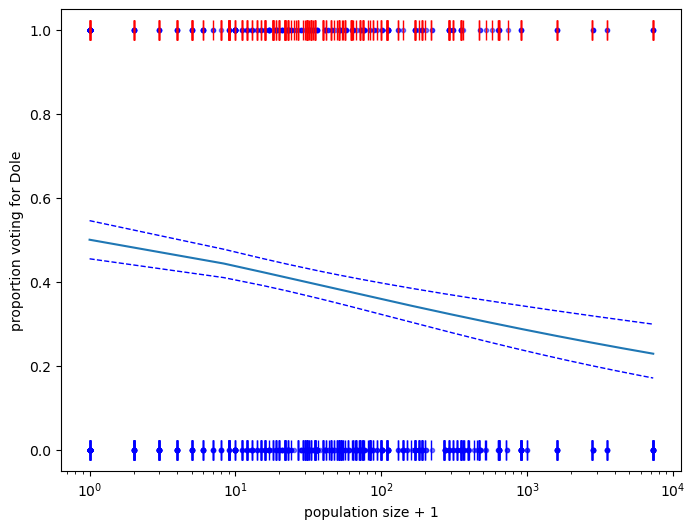

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.500962,0.023235,0.455539,0.546370
1,0.444297,0.017261,0.410775,0.478334
2,0.423226,0.016371,0.391505,0.455593
3,0.410109,0.016301,0.378580,0.442393
4,0.400595,0.016482,0.368765,0.433286
...,...,...,...,...
996,0.229650,0.032744,0.171782,0.299953
997,0.229624,0.032746,0.171753,0.299933
998,0.229598,0.032748,0.171724,0.299913
999,0.229572,0.032751,0.171696,0.299893


In [8]:
popul = nes96['popul'] + 1
Dole = nes96['Dole']

# Create a scatter plot with log-scaled x-axis
plt.figure(figsize=(8, 6))
plt.scatter(popul, Dole, c='blue', marker='.', alpha=0.5)

# Create a rug plot

x1 = nes96.loc[nes96['Dole'] == 1, 'popul']
x2 = nes96.loc[nes96['Dole'] == 0, 'popul']

plt.plot(x1, np.ones_like(x1), '|', color='red', markersize=15) #top
plt.plot(x2, np.zeros_like(x2), '|', color='blue', markersize=15) #bottom


# make predictions
Pop = list(np.linspace(0, 7300, num=1001) + 1) # as numpy.ndarray
newPop = [round(num, 1) for num in Pop] # rounding to 1 decimal place

Int_ = np.linspace(1.0, 1.0, num=1001) # the intercept as numpy.ndarray

# create the new dataframe for prediction
d = {'Intercept': list(Int_) , 'log_popul': np.log(np.array(newPop) + 1)} 
newPop_df = pd.DataFrame(data=d)     # Convert to a dataframe

# Prediction
preds = fm2.get_prediction(newPop_df).summary_frame(alpha=0.05) # response-type predictions

plt.plot(newPop, preds['mean']) 
plt.plot(newPop, preds['mean_ci_lower'], linestyle='dashed', color = "blue", linewidth=1.0)
plt.plot(newPop, preds['mean_ci_upper'], linestyle='dashed', color = "blue", linewidth=1.0)

# Set plot attributes
plt.xscale('log')
plt.xlabel('population size + 1')
plt.ylabel('proportion voting for Dole')

plt.show()
preds


The model is not particularly good, and the effect population density not particularly strong, but we can see a (significant) negative effect on voting for Dole, who did not resonate as well with the urban electorate

## 2.0   Exercise 2: Interactions
Let us return again to the Presidential Elections from exercise 1. We now want to investigate the interactive effect of two predictors, population density and level of education (see help file for explanation of what each level means). Since level of education is a categorical factor, plot the effect of age for each level of education.

### 2.1    Plot raw data interaction

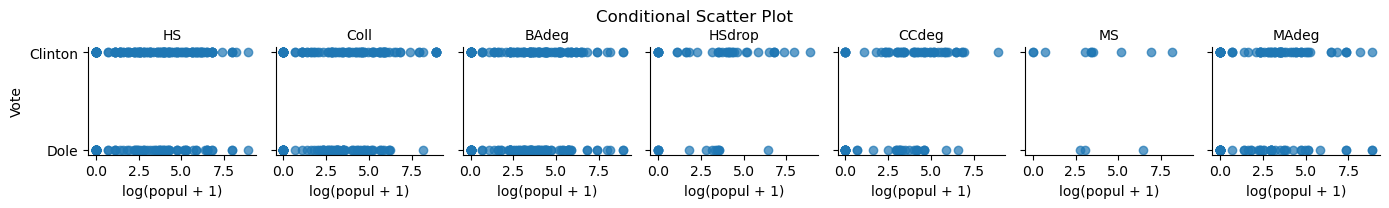

In [9]:
# Create conditional scatter plots

g = sns.FacetGrid(nes96, col="educ", height=2)
g.map(plt.scatter, "log_popul", "vote", alpha=0.7)

# Set axis labels and titles
g.set_axis_labels("log(popul + 1)", "Vote")
g.set_titles(col_template="{col_name}")

# Add a main title
g.fig.suptitle("Conditional Scatter Plot", y=1.02)

plt.show()

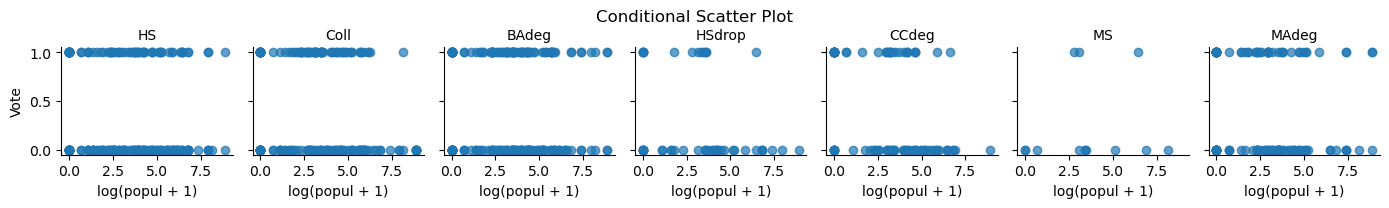

In [10]:
# Create conditional scatter plots with Vote as numeric (Dole=1, Clinton=0)

g = sns.FacetGrid(nes96, col="educ", height=2)
g.map(plt.scatter, "log_popul", "vote_ENC", alpha=0.7)

# Set axis labels and titles
g.set_axis_labels("log(popul + 1)", "Vote")
g.set_titles(col_template="{col_name}")

# Add a main title
g.fig.suptitle("Conditional Scatter Plot", y=1.02)

plt.show()

### 2.2    Analyse data for this interaction
Test the hypothesis, that the effect of population density depends on a voter’s educational status. To do so, fit the GLM and then summarise the finding in two ways: (1) using anova(., test="Chisq")and (2) using summary. <br>

Do they tell the same story?

In [11]:
# Define the formula for the logistic regression model
formula = 'vote_ENC ~ np.log(popul + 1) * educ'

# Fit logistic regression model
fint = sm.GLM.from_formula(formula, data=nes96, family=sm.families.Binomial()).fit()

# Print the summary of the logistic regression model
print(fint.summary())

Pop = np.linspace(0, 7300, num=944) + 1
newPop = [round(num, 1) for num in Pop] # rounding to 1 decimal place
educ_level = nes96['educ']

d = {'popul': newPop, 'educ':educ_level}
new_df = pd.DataFrame(data=d)     # Convert to a dataframe
new_df.head()

preds = fint.get_prediction(new_df).summary_frame(alpha=0.05) # response-type predictions
preds

                 Generalized Linear Model Regression Results                  
Dep. Variable:               vote_ENC   No. Observations:                  944
Model:                            GLM   Df Residuals:                      930
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -617.29
Date:                Mon, 18 Mar 2024   Deviance:                       1234.6
Time:                        12:24:47   Pearson chi2:                     941.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04908
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.457318,0.043428,0.374229,0.542851
1,0.472412,0.039815,0.395664,0.550486
2,0.481259,0.033543,0.416213,0.546946
3,0.474265,0.033294,0.409812,0.539587
4,0.469098,0.033632,0.404092,0.535171
...,...,...,...,...
939,0.368528,0.083404,0.224266,0.540886
940,0.368509,0.083416,0.224232,0.540893
941,0.368490,0.083427,0.224198,0.540900
942,0.247935,0.100179,0.103154,0.485842


In [12]:
# Fit the educ on vote(Dole=1) to calculate the values for the ANOVA

feduc = sm.GLM.from_formula(formula='vote_ENC ~ educ', data=nes96, family=sm.families.Binomial()).fit()

dev_log =  fm2.null_deviance - fm2.deviance
dev_edu = feduc.null_deviance - feduc.deviance
dev_int = fint.null_deviance - fint.deviance - dev_log - dev_edu
df_int = fint.df_model - 1 - feduc.df_model
res_df_null = fm2.df_resid + fm2.df_model
res_df_edu = fint.df_resid + df_int
res_dev_edu = fint.deviance + dev_int

p_value_log = 1 - stats.chi2.cdf(fm2.deviance, fm2.df_resid)
p_value_edu = 1 - stats.chi2.cdf(dev_edu, fm2.df_resid - res_df_edu)
p_value_int = 1 - stats.chi2.cdf(dev_int, fm2.df_resid - fint.df_resid)


print("ANOVA")
table = [["Term", "Df", "Deviance", "Resid. Df", "Resid Dev.", "Pr(>Chi)"],
         ["NULL", "", "",  res_df_null, fint.null_deviance,  ""],
         ["log(popul + 1)", fm2.df_model, round(dev_log, 3), fm2.df_resid, fm2.deviance, round(p_value_log,5)],
         ["educ", feduc.df_model, round(dev_edu, 3), res_df_edu, res_dev_edu, round(p_value_edu,5)],
         ["log(popul + 1):educ", df_int, round(dev_int, 3), fint.df_resid, fint.deviance, round(p_value_int,5)]]

print(tabulate(table, headers="firstrow"))

ANOVA
Term                 Df    Deviance      Resid. Df    Resid Dev.  Pr(>Chi)
-------------------  ----  ----------  -----------  ------------  ----------
NULL                                           943       1282.09
log(popul + 1)       1     27.284              942       1254.81  0.0
educ                 6     11.633              936       1243.18  0.07067
log(popul + 1):educ  6     8.585               930       1234.59  0.73787


Note: It may be confusing that in the `describe` the labels of eduction are not as they are in the data. That is because it is an ordered factor, where each step up in education is known to be higher than those below. To get a feeling for how R handles this internally run the following code:<br>
`import patsy
patsy.dmatrices('vote ~ educ', data=nes96, return_type='dataframe')`. <br>

The `describe` suggests a significant effect for some interaction (population density with BA degree), but not any other. This is not enough to yield an overall significant effect of education or the interaction with population density.<br>

The two types of output represent answers to different questions. The *summary* returns the effect of each predictor
in the fitted model. The anova is in fact a sequential test of how important a predictor is *when added to the previous model*.
So here education almost, but not quite, adds a significant amount of explanation to population density, despite 11.6 (12.2 in R) deviance points explained. The reason is that the 7 categories for education require 6 additional parameters to be
fitted, and anova can only add the entire predictor, which is not worth the 6 degrees of freedom. The same goes for
the interaction interaction, with its 6 additional parameters.<br>

It may be tempting to collapse some levels of education to form, say, three levels and nudge them into significance.
You should not do that (even if some stats books show you how to do that)! It would be a change of predictors *after the
fact*, and the resulting p-values would be incorrect (because it does not represent the fact that you have pooled levels
only after you found them not to be significant).<br>

Thus: be smart *before* the analysis and devise a way to put education onto a continuous scale, or you will need many
more data points.

### 2.3   Plot the GLM effects
Because it will become rather messy with so many error lines, in this very exceptional case, only plot the effect of population density for each educational level without confidence interval.

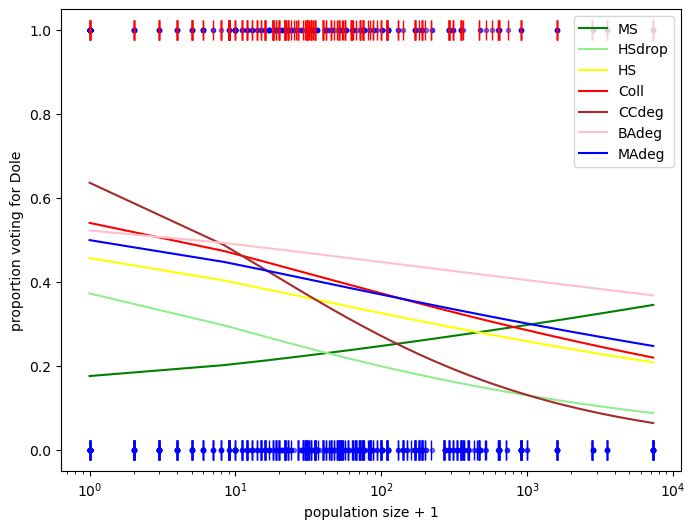

In [13]:
Pop = np.linspace(0, 7300, num=1001) + 1
newPop = [round(num, 1) for num in Pop] # rounding to 1 decimal place

# Predict probabilities for each education level
educ_levels = ["MS", "HSdrop", "HS", "Coll", "CCdeg", "BAdeg", "MAdeg"]
preds = {}
for educ_level in educ_levels:
    d = {'popul': newPop, 'educ':educ_level}
    new_df = pd.DataFrame(data=d)     # Convert to a dataframe
    preds[educ_level] = fint.get_prediction(new_df).summary_frame(alpha=0.05) # response-type predicts

popul = nes96['popul'] + 1
Dole = nes96['Dole']

# Create a scatter plot with log-scaled x-axis
plt.figure(figsize=(8, 6))
plt.scatter(popul, Dole, c='blue', marker='.', alpha=0.5)

# Create a rug plot
x1 = nes96.loc[nes96['Dole'] == 1, 'popul']
x2 = nes96.loc[nes96['Dole'] == 0, 'popul']

plt.plot(x1, np.ones_like(x1), '|', color='red', markersize=15) #top
plt.plot(x2, np.zeros_like(x2), '|', color='blue', markersize=15) #bottom
plt.xscale('log')

# add the lines
plt.plot(newPop, preds['MS']['mean'], label='MS', color='green')
plt.plot(newPop, preds['HSdrop']['mean'], label='HSdrop', color='lightgreen')
plt.plot(newPop, preds['HS']['mean'], label='HS', color='yellow')
plt.plot(newPop, preds['Coll']['mean'], label='Coll', color='red')
plt.plot(newPop, preds['CCdeg']['mean'], label='CCdeg', color='brown')
plt.plot(newPop, preds['BAdeg']['mean'], label='BAdeg', color='pink')
plt.plot(newPop, preds['MAdeg']['mean'], label='MAdeg', color='blue')

plt.xlabel('population size + 1')
plt.ylabel('proportion voting for Dole')
plt.legend(loc='upper right')

plt.show()


Note that it is difficult to align the output of the summary with the lines: which one represents the significant interaction? <br> 
(Answer to the check in Exercise 2: In variable vote, Clinton and Dole are internally stored as 1 and 0. `(nes96['vote'] == 'Dole').astype(int)` will thus turn these values and make Dole 1 and Clinton 0. The y-axis now represents 1 as “will vote for Dole”, and 0 as “will vote for Clinton”.)